### NAME : Mohit Bhadauria
### EMAIL  : thakurmohitbhadauria@gmail.com

 # <span style='color:PURPLE'>       RED WINE QUALITY PREDICTION              </span>


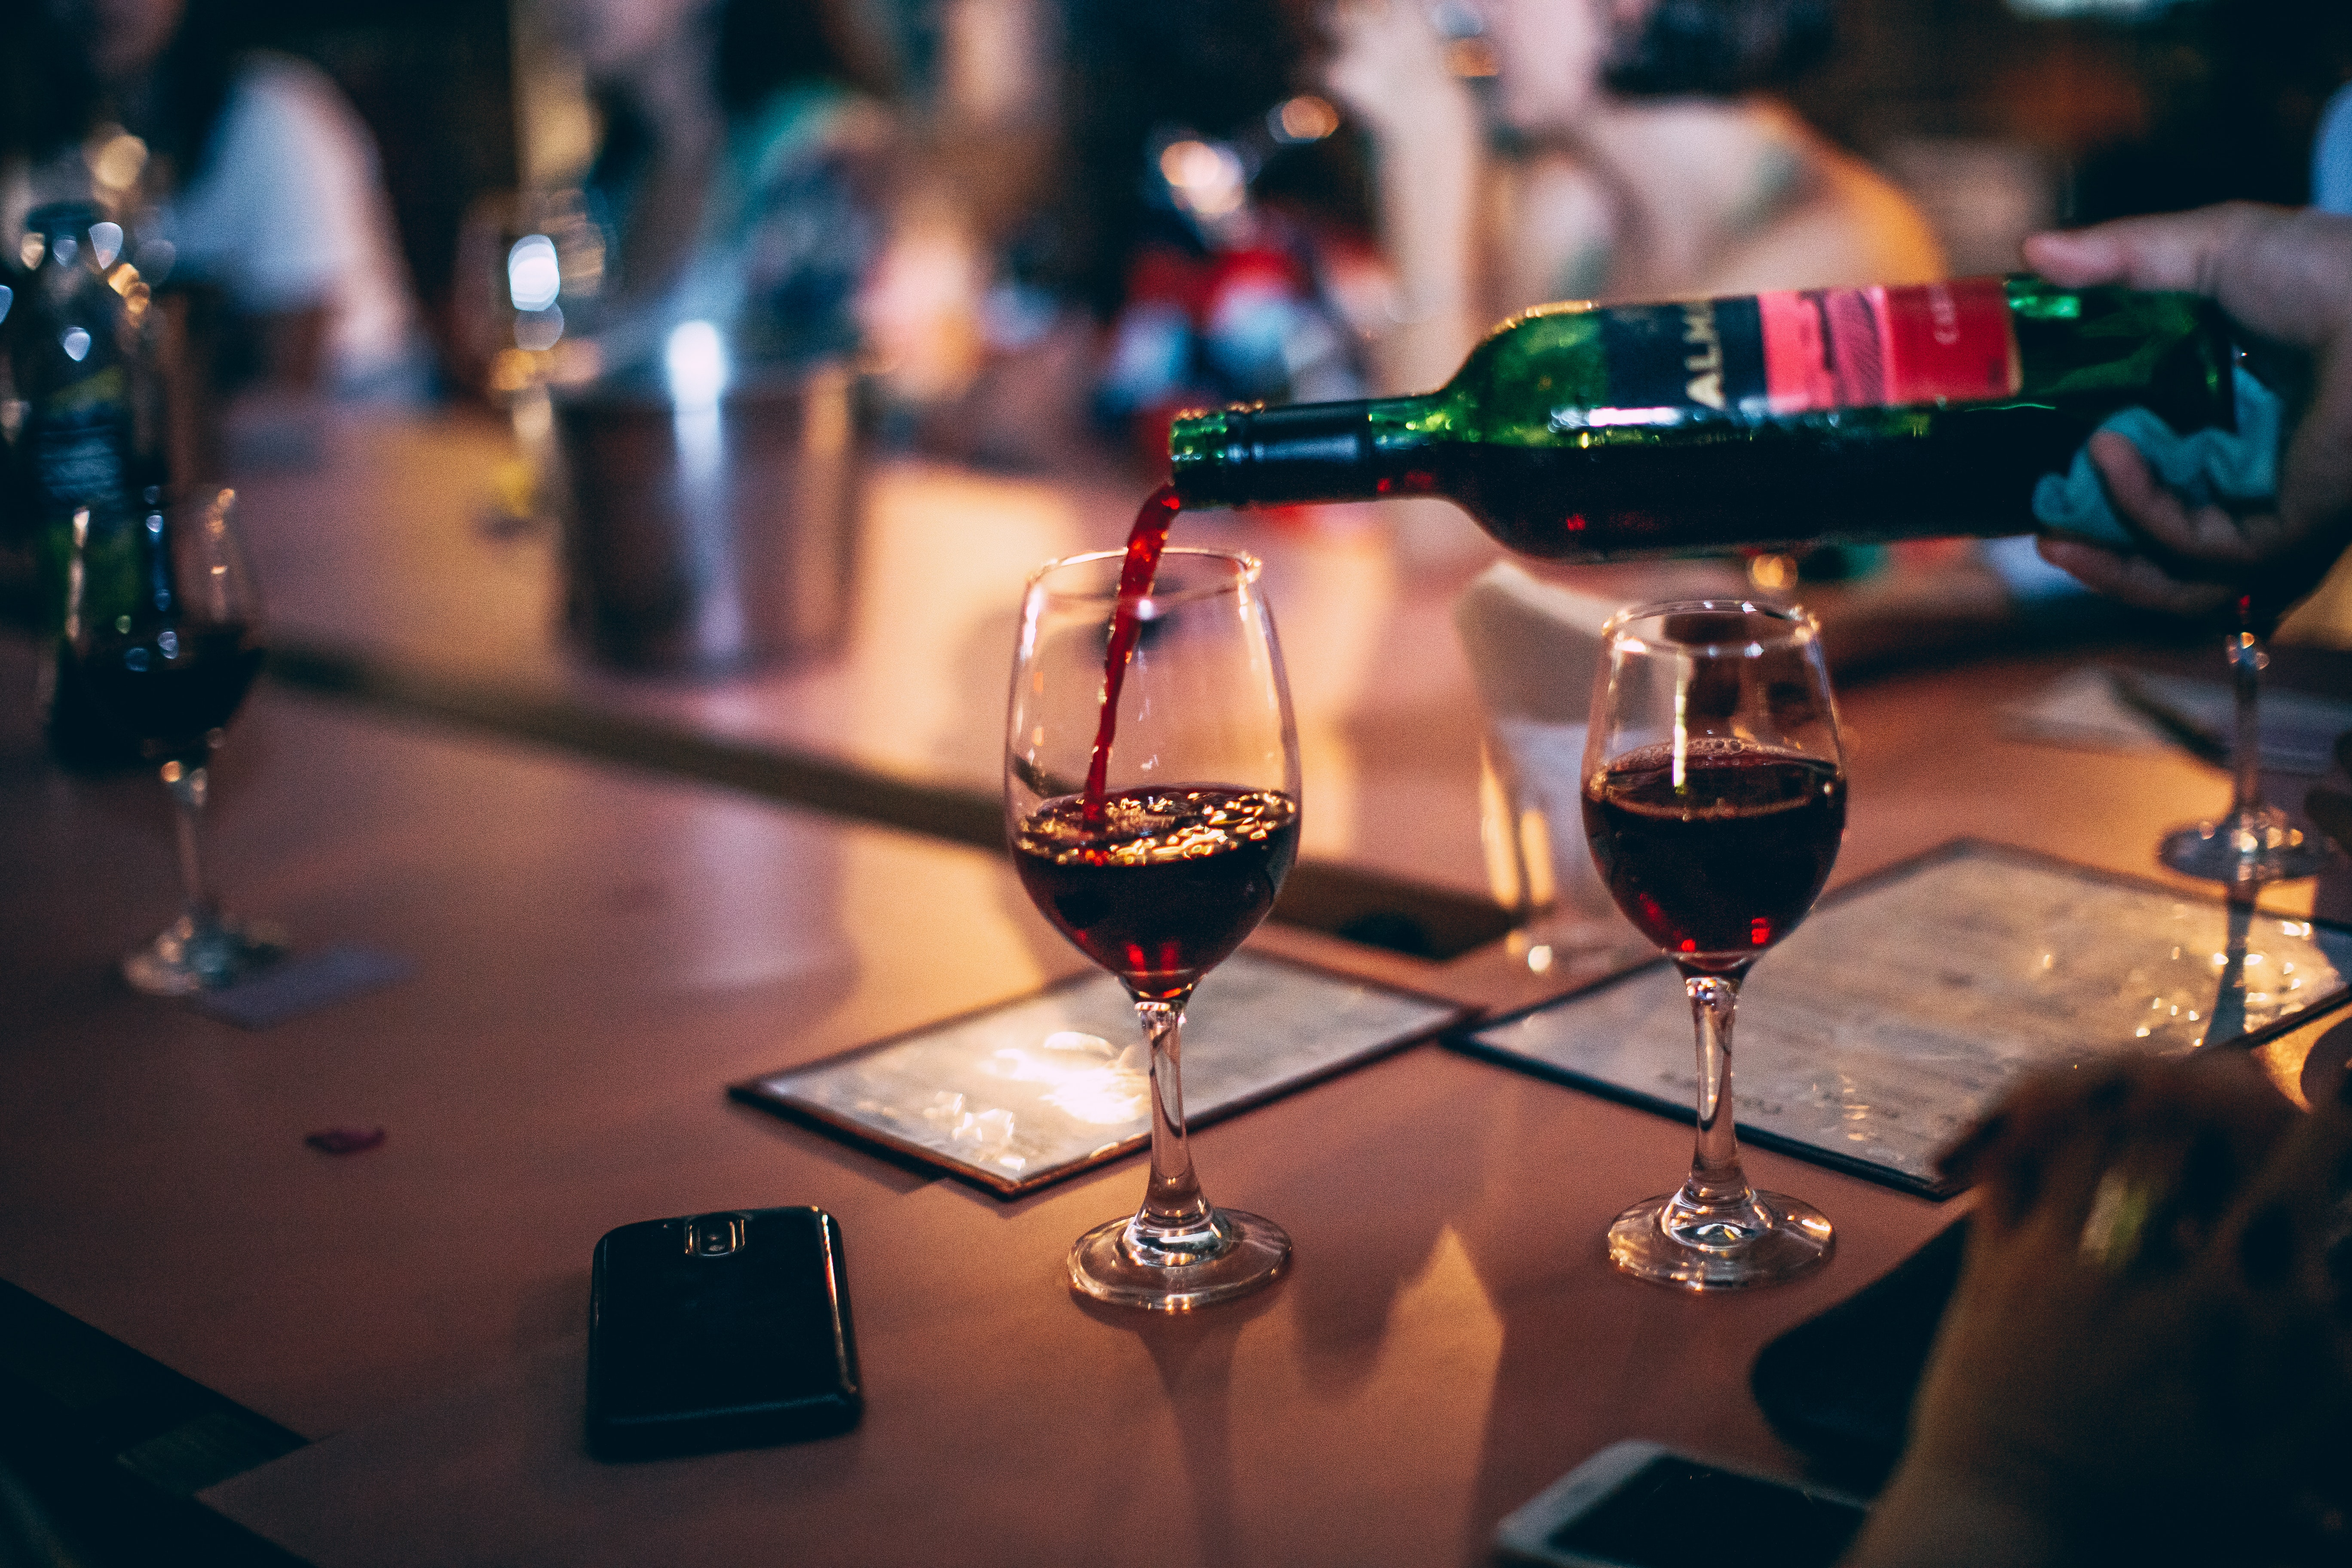

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing CSV

In [2]:
df = pd.read_csv('redwinequality.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

## Checking Null Values

In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Visualizing Quality

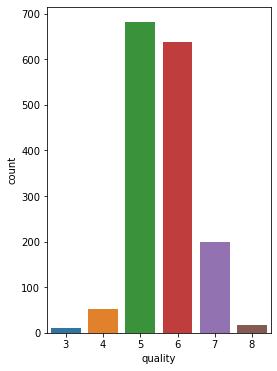

In [5]:
plt.figure(figsize=(4,6))
sns.countplot(df['quality'])
plt.show()

## Visualizing Fixed Acidity vs Density

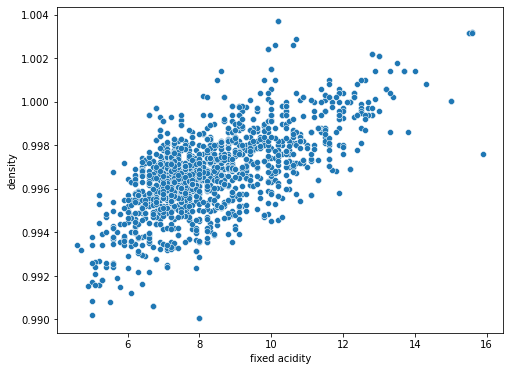

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(df['fixed acidity'],df['density'],data=df)
plt.show()

## Visualizing Density vs Citric Acid

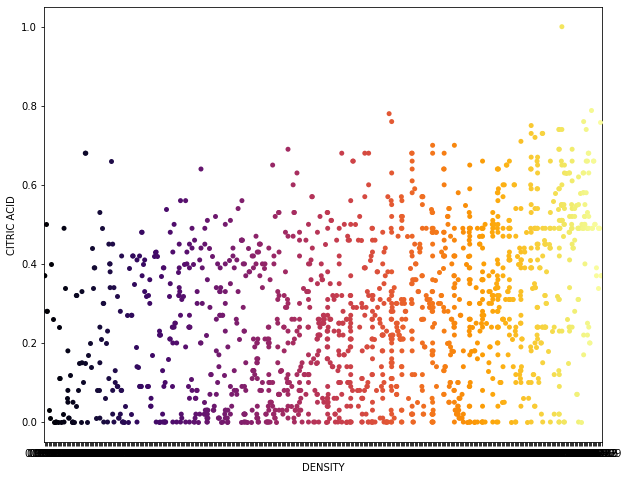

In [7]:
plt.figure(figsize=(10,8))
sns.swarmplot(df['density'],df['citric acid'],palette='inferno')
plt.xlabel('DENSITY')
plt.ylabel('CITRIC ACID')

plt.show()


In [8]:
X = df.drop(['quality'],axis='columns')

In [9]:
y = df[['quality']]

## Importing SMOTE for oversampling Imbalanced classification data

In [10]:
from imblearn.over_sampling import SMOTE

In [11]:
os = SMOTE()

In [12]:
X_res, y_res = os.fit_sample(X,y)

## Importing Train Test Split for Training and Testing the data

In [13]:
from sklearn.model_selection import train_test_split


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,random_state=0,test_size=0.2)

## Importing Standard Scaler for Mean and Unit Variance

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
stdscaler = StandardScaler().fit(X_train)

In [17]:
X_train_std = stdscaler.transform(X_train)

In [18]:
X_test_std  = stdscaler.transform(X_test)

## Importing Logistic Regression Algorithm

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr = LogisticRegression()

In [21]:
lr.fit(X_train_std,y_train)

LogisticRegression()

In [22]:
predictions = lr.predict(X_test_std)

## Importing Accuracy score from sklearn to check the score 

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
print('Accuracy Score is :' ,accuracy_score(predictions,y_test))

Accuracy Score is : 0.5990220048899756


## Importing Decision Tree Classifier Algorithm

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dtc = DecisionTreeClassifier()

In [27]:
dtc.fit(X_train_std,y_train)

DecisionTreeClassifier()

In [28]:
predictions = dtc.predict(X_test_std)

### Checking the score 

In [29]:
print('Accuracy score is :',accuracy_score(predictions,y_test))

Accuracy score is : 0.8019559902200489


## Importing Support Vector Machine Algorithm

In [30]:
from sklearn.svm import SVC

In [31]:
svm = SVC() 

In [32]:
svm.fit(X_train_std,y_train)

SVC()

In [33]:
predictions = svm.predict(X_test_std)

### Checking the score

In [34]:
print('Accuracy score is : ',accuracy_score(predictions,y_test))

Accuracy score is :  0.7603911980440098


## Importing Random Forest Classifier Algorithm

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf = RandomForestClassifier(n_estimators=70,random_state=0)

In [37]:
rf.fit(X_train_std,y_train)

RandomForestClassifier(n_estimators=70, random_state=0)

In [38]:
predictions = rf.predict(X_test_std)

### Checking the score

In [39]:
print('Accuracy score is :' ,accuracy_score(predictions,y_test))

Accuracy score is : 0.8618581907090465
